# A Brief Introduction to Statistical Learning

## Loading an example dataset
Scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification.

In [4]:
# import two famous datasets
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

A dataset is a dictionary-like object that holds all the data and some metadata about the data.
For instance, in the case of the digits dataset, digits.data gives access to the features that can be used to classify the digits samples:

In [4]:
print(digits.data)
print(digits.data.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


and digits.target gives the ground truth for the digit dataset, that is the number corresponding to each digit image that we are trying to learn:

In [5]:
# get the label of the digits data set
digits.target
# get the size of the target
digits.target.shape

(1797,)

## Shape of the data arrays
The data is always a 2D array, shape (n_samples, n_features), although the original data may have had a different shape. In the case of the digits, each original sample is an image of shape (8, 8) and can be accessed using:

In [10]:
digits.images[0].shape

(8, 8)

In [11]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## Four Typical Problems in Statistical Learnning

The typical problems in real word such as business setting, medical problems can be reduced into four categories:

+ Classification Problem
    + Spam Filter
    + Google news classification
    + Cancer cell classification(Benign, Malignant)
+ Regression Problem
    + Marketing Promotion Channel Analysis
    + Risk analysis in credit card company
+ Clustering Problem
    + Amazon and Alibaba Recommendation System
    + Finding subtypes in disease research
+ Dimension Reduction Problem
    + Compression of file
    + Data Visualization

A more intuitive illustration can be seen in the Sklearn Cheat Sheet. We will see an classification problems as an example in the following.

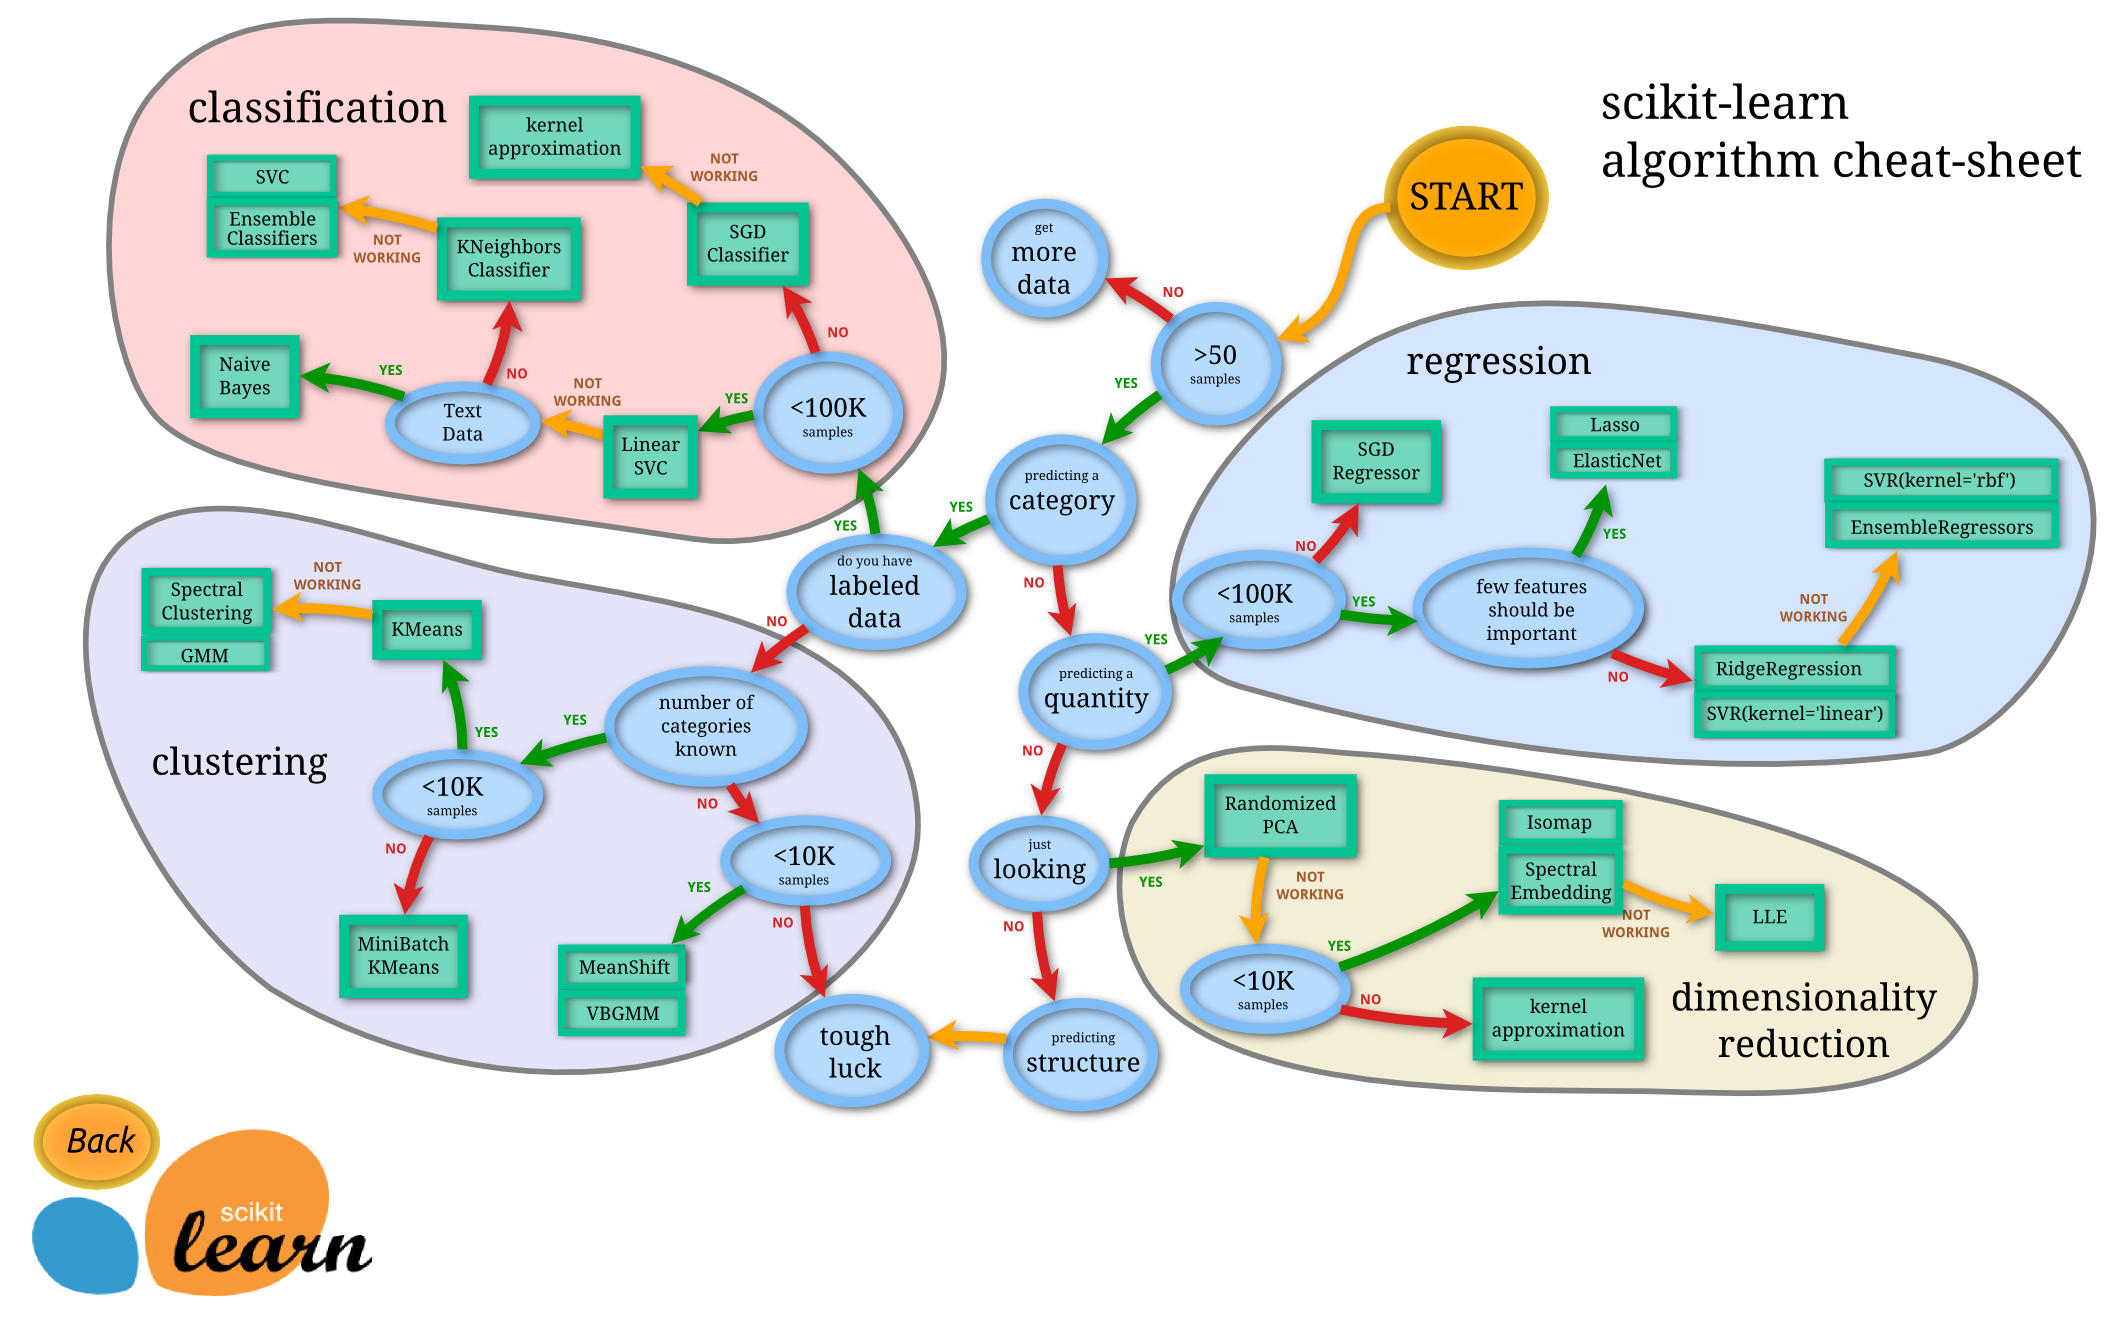

In [2]:
from IPython.display import Image
Image(filename='./Sklearn_Cheat_Sheet.png', width=500)

## Learning and predicting
In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.

In scikit-learn, an estimator for classification is a Python object that implements the methods fit(X, y) and predict(T).

An example of an estimator is the class sklearn.svm.SVC that implements support vector classification. The constructor of an estimator takes as arguments the parameters of the model, but for the time being, we will consider the estimator as a black box:

In [30]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100., ) #tuning parameters

We call our estimator instance `clf`, as it is a classifier. It now must be fitted to the model, that is, it must learn from the model. This is done by passing our training set to the `fit` method. As a training set, let us use all the images of our dataset apart from the last one. We select this training set with the `[:-1]` Python syntax, which produces a new array that contains all but the last entry of `digits.data`:

In [31]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now you can predict new values, in particular, we can ask to the classifier what is the digit of our last image in the digits dataset, which we have not used to train the classifier:

In [38]:
clf.predict(digits.data[-1:])

array([8])

The corresponding image is the following:
![image of digit](http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_last_image_001.png)

As you can see, it is a challenging task: the images are of poor resolution. Do you agree with the classifier?

# A complete code for Handwritten Digit Recognition

![digit image](http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png)

Automatically created module for IPython interactive environment


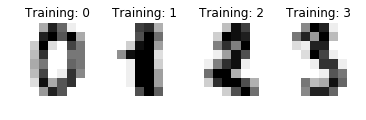

In [9]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
# build a data stucture that connects the images and labels
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

### Data Structure Preparation

In [34]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
# n_samples is the number of rows and -1 standards for automatically adjusts the number of columns
data = digits.images.reshape((n_samples, -1))

### Use SVM method to do classification

Accuracy Score for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
0.9688542825361512

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


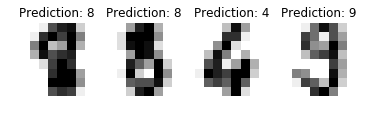

In [35]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001) #default RBF

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Accuracy Score for classifier %s:\n%s\n"
      % (classifier, metrics.accuracy_score(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

# Perceptron and Iris Dataset

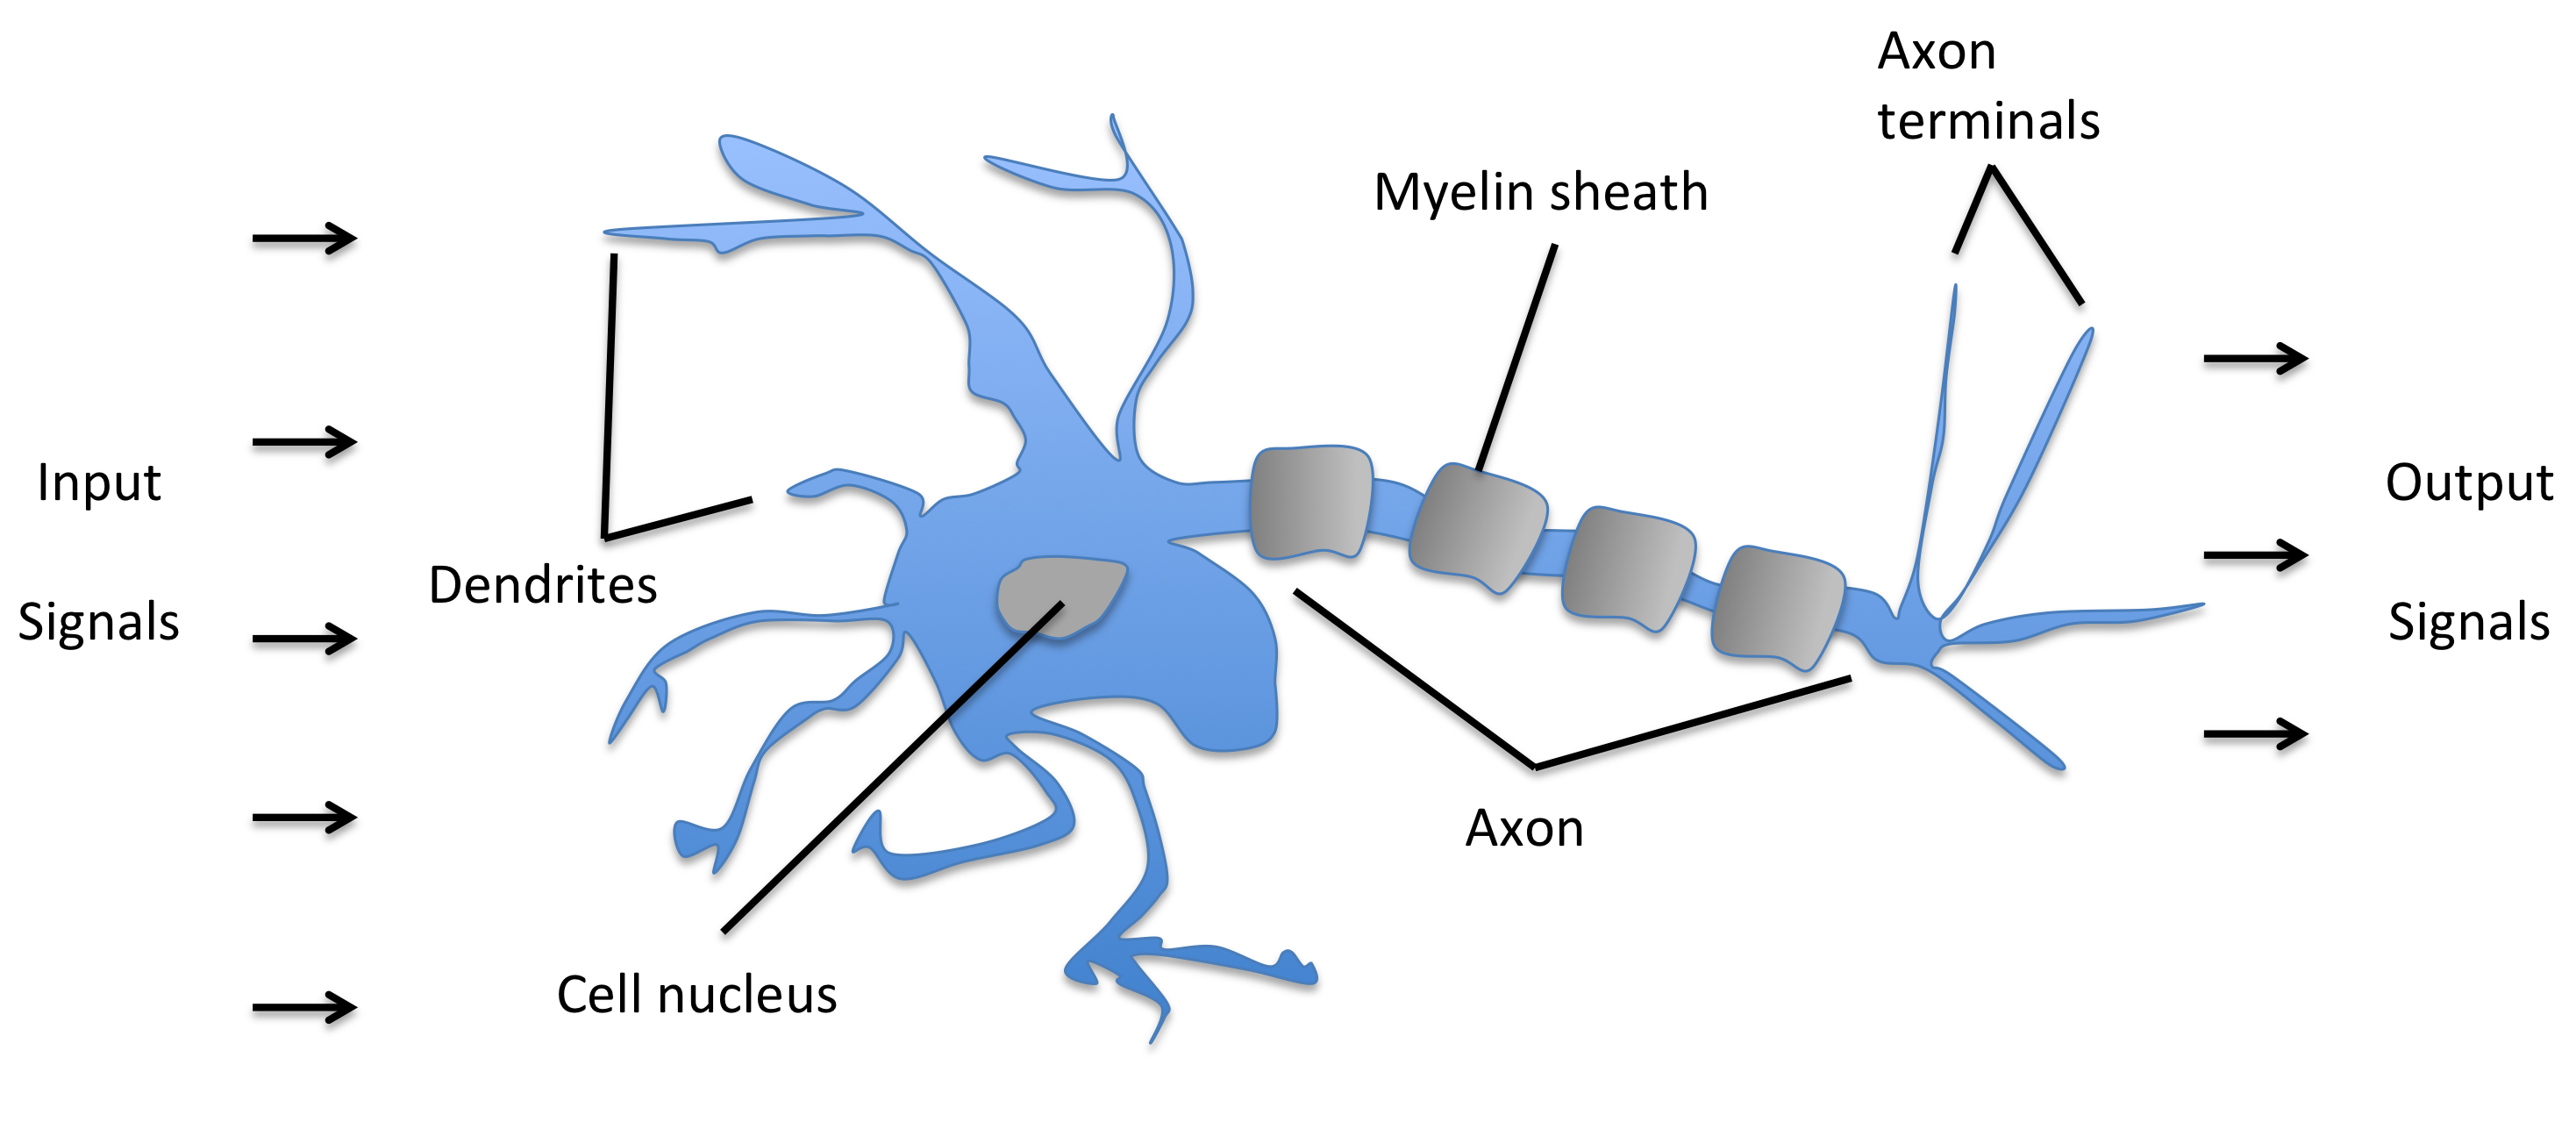

In [51]:
Image(filename='./Neuron.png', width=500) 

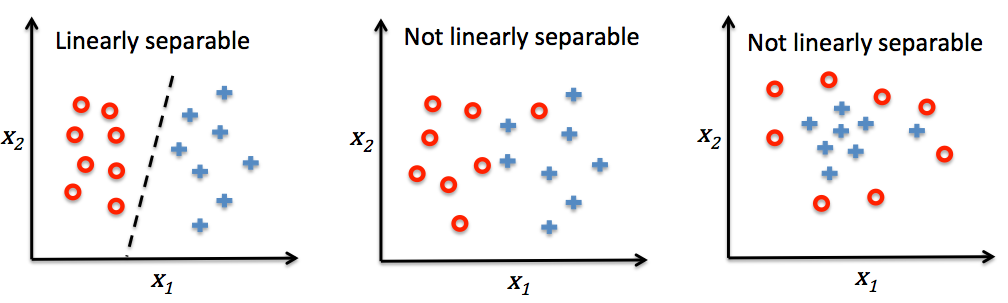

In [52]:
Image(filename='./linear_separable.png', width=500) 

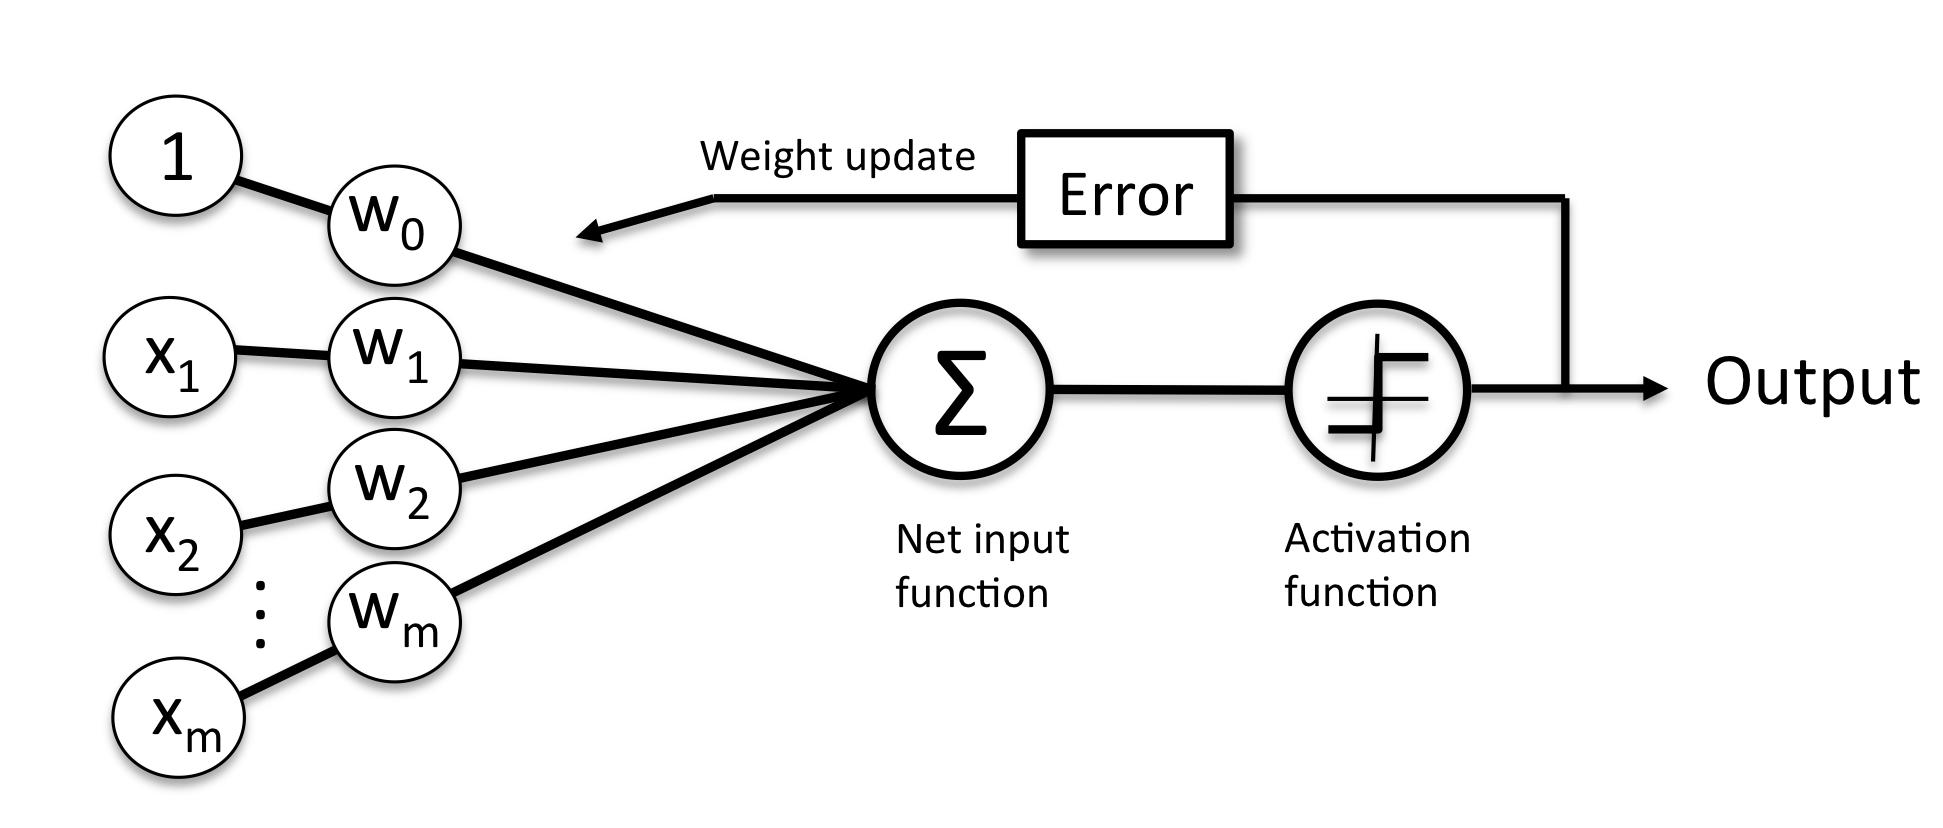

In [54]:
Image(filename='./working_mechanism.png', width=600) 

### Import the data

In [62]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data',header=None)
df.head(20)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Plotting the Iris Data

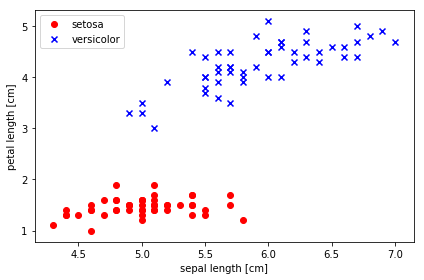

In [39]:
# visualize the dataset according to sepal length and petal length
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./images/02_06.png', dpi=300)
plt.show()

In [45]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, n_iter=10)
ppn.fit(X, y)

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=10, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

### Plotting the decision regions

In [46]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

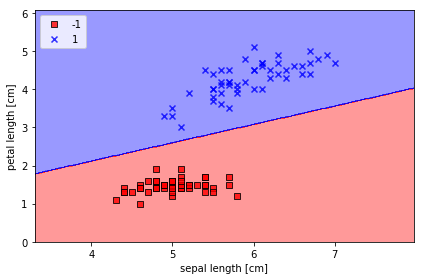

In [47]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()